## Time Series 1. Introduction to the analysis of time series

### Task 1: Time Series Cases
Выберите наборы данных, которые можно интерпретировать как временные ряды:  
    а) зависимость цены на недвижимость в конкретном регионе от времени,  
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,  
    в) количество отказов компьютера,  
    г) число обращений в поликлинику по району,  
    д) координаты автобуса при движении по маршруту,  
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

 а, д

### Task 2: EDA (Exploratory Data Analysis)   
1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.  
2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
# import pandas_profiling
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
# data as of April 9, 2020
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12884,12885,04/07/2020,Wyoming,US,2020-04-07 23:11:31,216.0,0.0,0.0
12885,12886,04/07/2020,Xinjiang,Mainland China,2020-04-07 23:11:31,76.0,3.0,73.0
12886,12887,04/07/2020,Yukon,Canada,2020-04-07 23:11:31,7.0,0.0,0.0
12887,12888,04/07/2020,Yunnan,Mainland China,2020-04-07 23:11:31,184.0,2.0,173.0
12888,12889,04/07/2020,Zhejiang,Mainland China,2020-04-07 23:11:31,1265.0,1.0,1230.0


In [4]:
COVID_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12889 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              12889 non-null  int64  
 1   ObservationDate  12889 non-null  object 
 2   Province/State   6687 non-null   object 
 3   Country/Region   12889 non-null  object 
 4   Last Update      12889 non-null  object 
 5   Confirmed        12889 non-null  float64
 6   Deaths           12889 non-null  float64
 7   Recovered        12889 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 805.7+ KB


In [5]:
COVID_.describe()

,SNo,Confirmed,Deaths,Recovered
count,12889.000000,12889.000000,12889.000000,12889.000000
mean,6445.000000,1465.407945,68.504073,372.512530
std,3720.878145,8477.771878,632.034355,3385.954419
min,1.000000,0.000000,0.000000,0.000000
25%,3223.000000,5.000000,0.000000,0.000000
50%,6445.000000,49.000000,0.000000,1.000000
75%,9667.000000,331.000000,3.000000,22.000000
max,12889.000000,141942.000000,17127.000000,64073.000000


In [6]:
COVID = COVID_.copy()
COVID_['Date']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Date']= pd.to_datetime(COVID['ObservationDate']).dt.date

In [7]:
COVID = COVID.groupby(['Date','Country/Region'])[['Confirmed','Deaths','Recovered']].sum()
COVID.tail(20)

Confirmed   Deaths  Recovered
Date       Country/Region                                     
2020-04-07 Tanzania                   24.0      1.0        5.0
           Thailand                 2258.0     27.0      888.0
           Timor-Leste                 1.0      0.0        0.0
           Togo                       65.0      3.0       23.0
           Trinidad and Tobago       107.0      8.0        1.0
           Tunisia                   623.0     23.0       25.0
           Turkey                  34109.0    725.0     1582.0
           UK                      55949.0   6171.0      325.0
           US                     396223.0  12722.0    21763.0
           Uganda                     52.0      0.0        0.0
           Ukraine                  1462.0     45.0       28.0
           United Arab Emirates     2359.0     12.0      186.0
           Uruguay                   424.0      7.0      150.0
           Uzbekistan                520.0      2.0       30.0
           Venezuela                 165.0      7.0       65.0
           Vietnam                   249.0      0.0      123.0
           West Bank and Gaza        261.0      1.0       42.0
           Western Sahara              4.0      0.0        0.0
           Zambia                     39.0      1.0        7.0
           Zimbabwe                   11.0      2.0        0.0

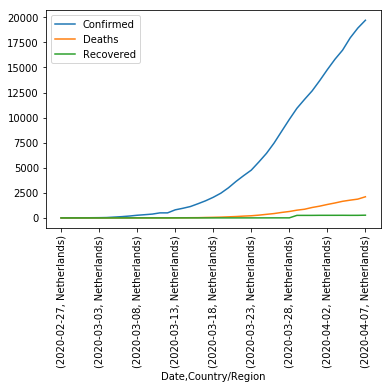

In [8]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='Netherlands', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Date'), rotation=90)

plt.show()

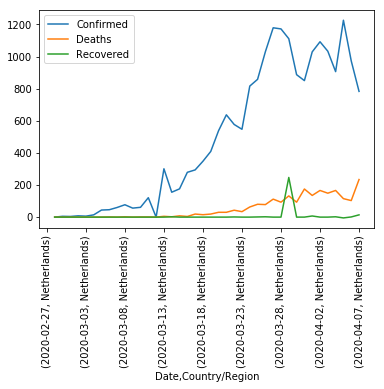

In [9]:
# derivative 1
COVID.loc[COVID.index.get_level_values('Country/Region')=='Netherlands', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Date'), rotation=90)

plt.show()

In [10]:
# check data for missing values
nulls_confirmed = COVID['Confirmed'].isnull().sum()
nulls_deaths = COVID['Deaths'].isnull().sum()
nulls_recovered = COVID['Recovered'].isnull().sum()
nulls_confirmed, nulls_deaths, nulls_recovered 

(0, 0, 0)

In [11]:
# pandas_profiling.ProfileReport(COVID)

#### Summary:  
Time interval: 01/22/2020 - 04/07/2020  
Step: 1 day  
Total number of observations: 12889  
Data Type: float64  
Missing values: no  
Anomalies: peak points on 2020-03-13, 2020-03-28, 2020-04-07

### Task 3: Resampling Data  
Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели. Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )